# Parametrization for the EoS of f(R) model

## Preamble

In [1]:
%pylab inline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

## Datos

Tenemos dos archvos, uno con el rango completo de redshifts (o factor de escala), y otro donde hemos cortado el rango hasta $0\leq z \leq 3$

In [3]:
#  columna 1: redshift (z) 
#  columna 2: factor de escala en unidades de hoy (a/a_hoy)
#  columna 3: w_X  (P_x / \rho_X)
#  columna 4: w_total  (P_total/ \rho_total)
#  columna 5: H/H_hoy

frdata = np.loadtxt('eos-fit-Hun4.txt')

redshifts=frdata[:,0]
ascale = frdata[:,1]
wx= frdata[:,2]


frdataobs = np.loadtxt('eos-fit-Hun4-hasta3.dat')

zobs=frdata[:,0]
aobs = frdata[:,1]
wxobs= frdata[:,2]


vectorize(frdata)
vectorize(frdataobs)

In [17]:
 amax(redshifts), amin(redshifts)

(8.9741824500000007, -0.99999927300000002)

Vamos a ver cómo se ven las ecuaciones de estado $w(a)$ y $w(z)$, así como la evolución de $H(z)/H_0$

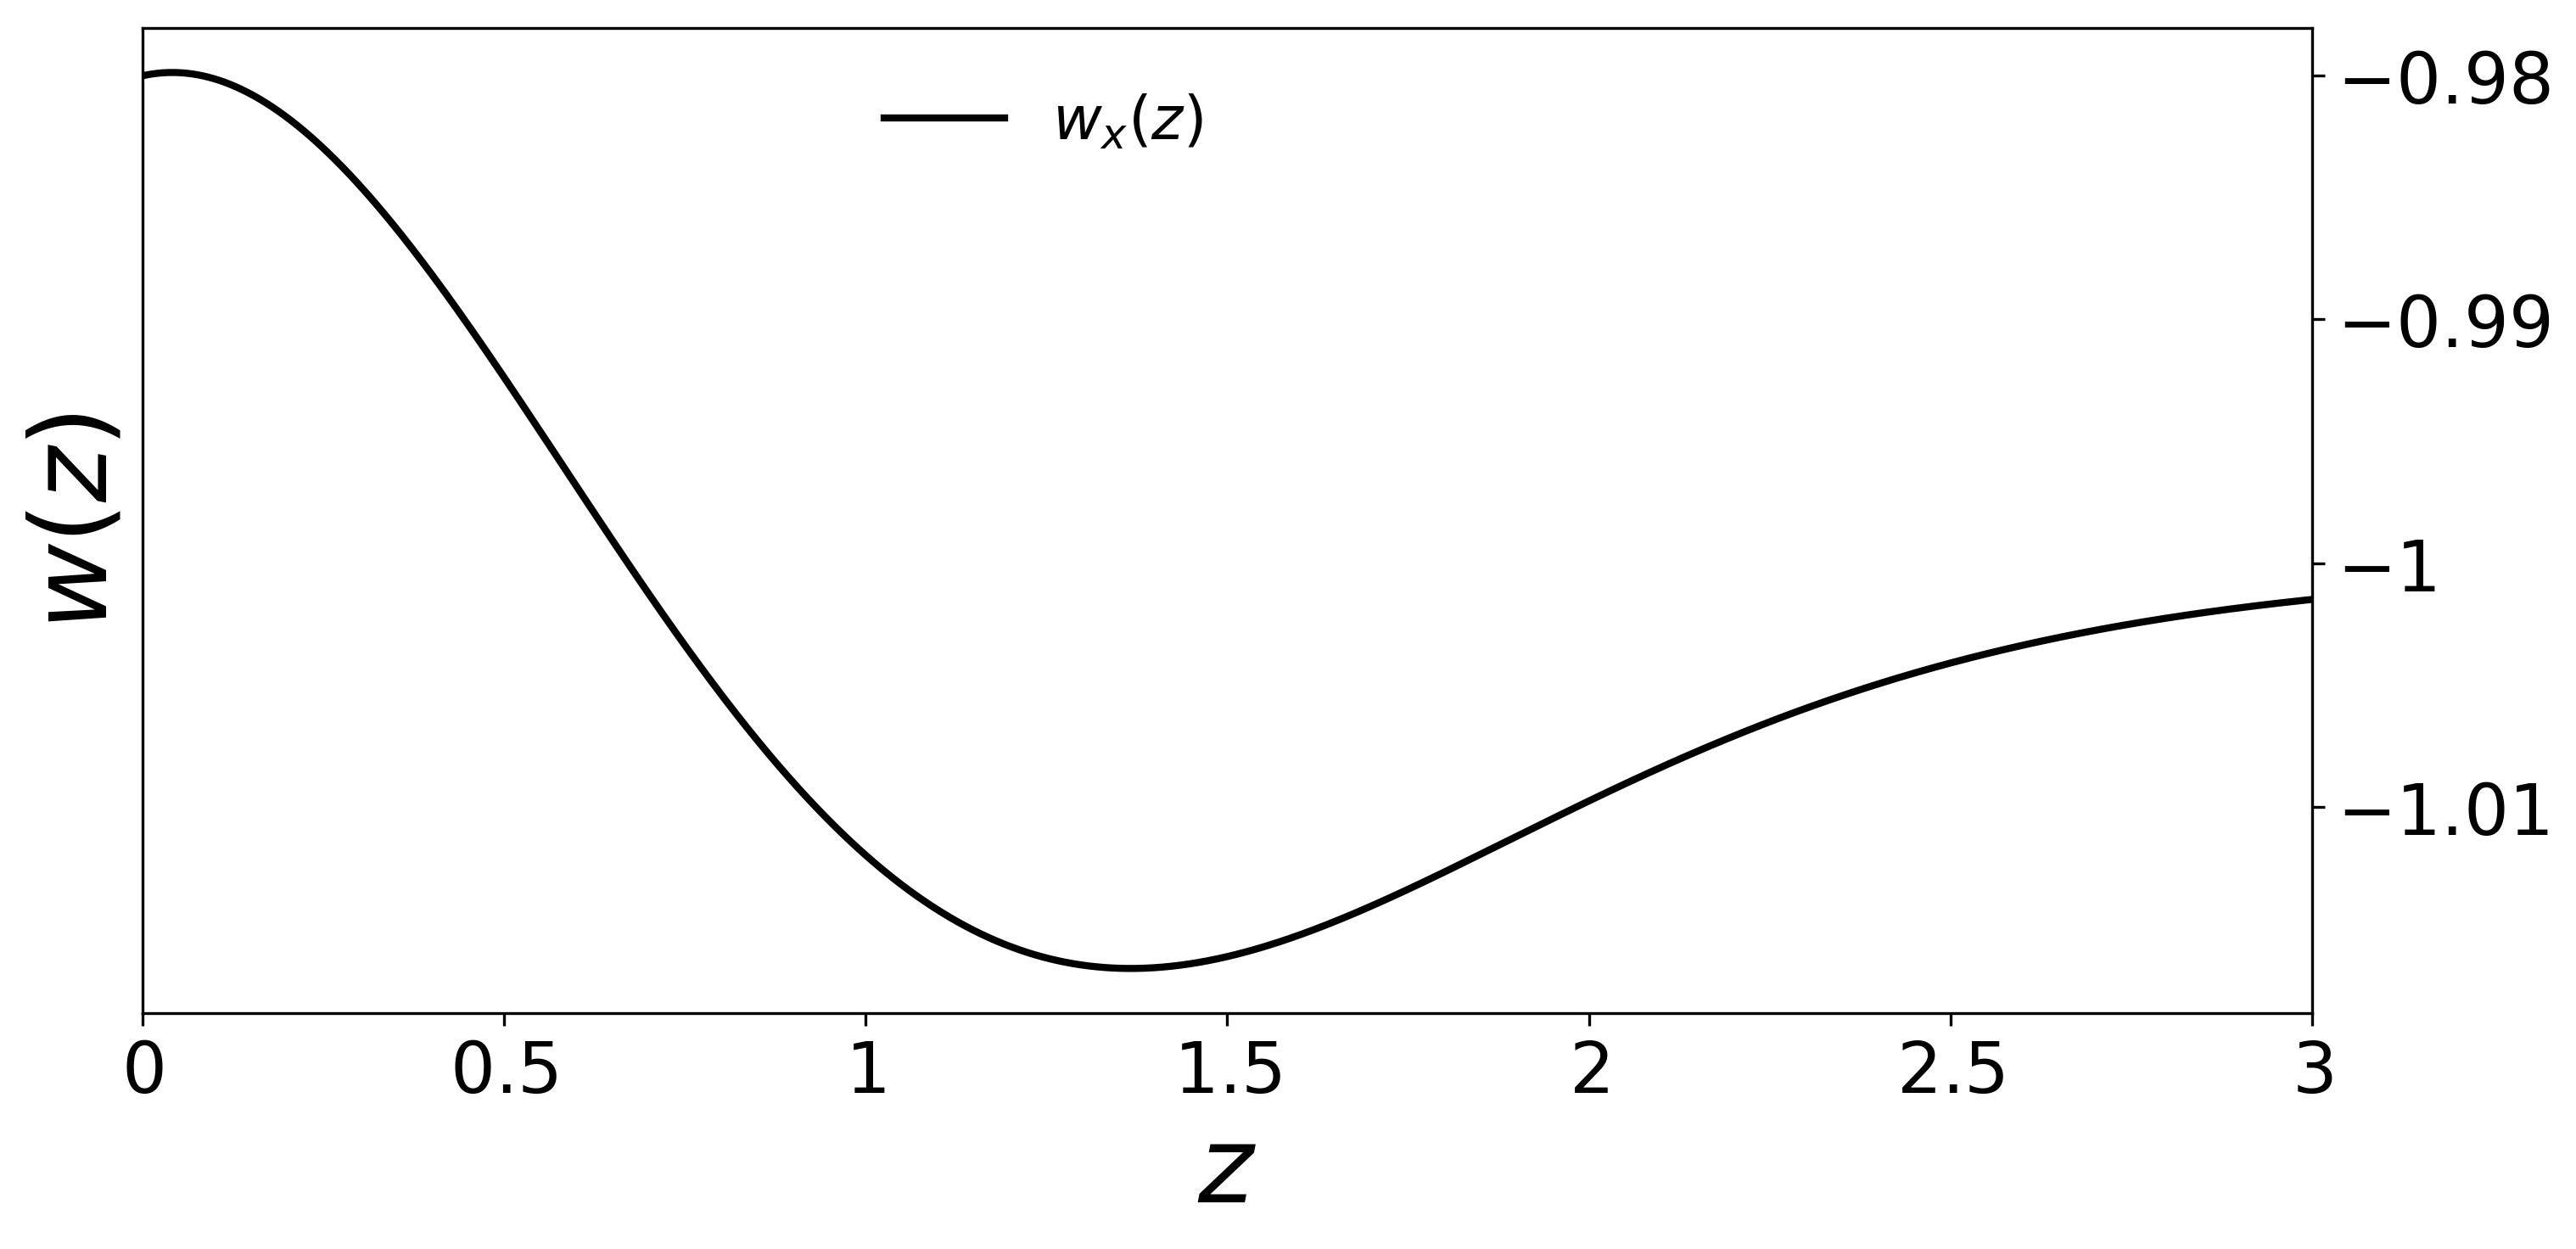

In [4]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2

fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()

plot(redshifts, wx, ls='-', color="black", label = '$w_x(z)$')
#plot(frdata[:,0], frdata[:,3], ls='--', color="red", label = 'total')
plt.legend(bbox_to_anchor=(0.5, 0.85), loc='lower right', borderaxespad=0.,prop={'size':17}, frameon=False)



cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

plt.xlim((0,3))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################




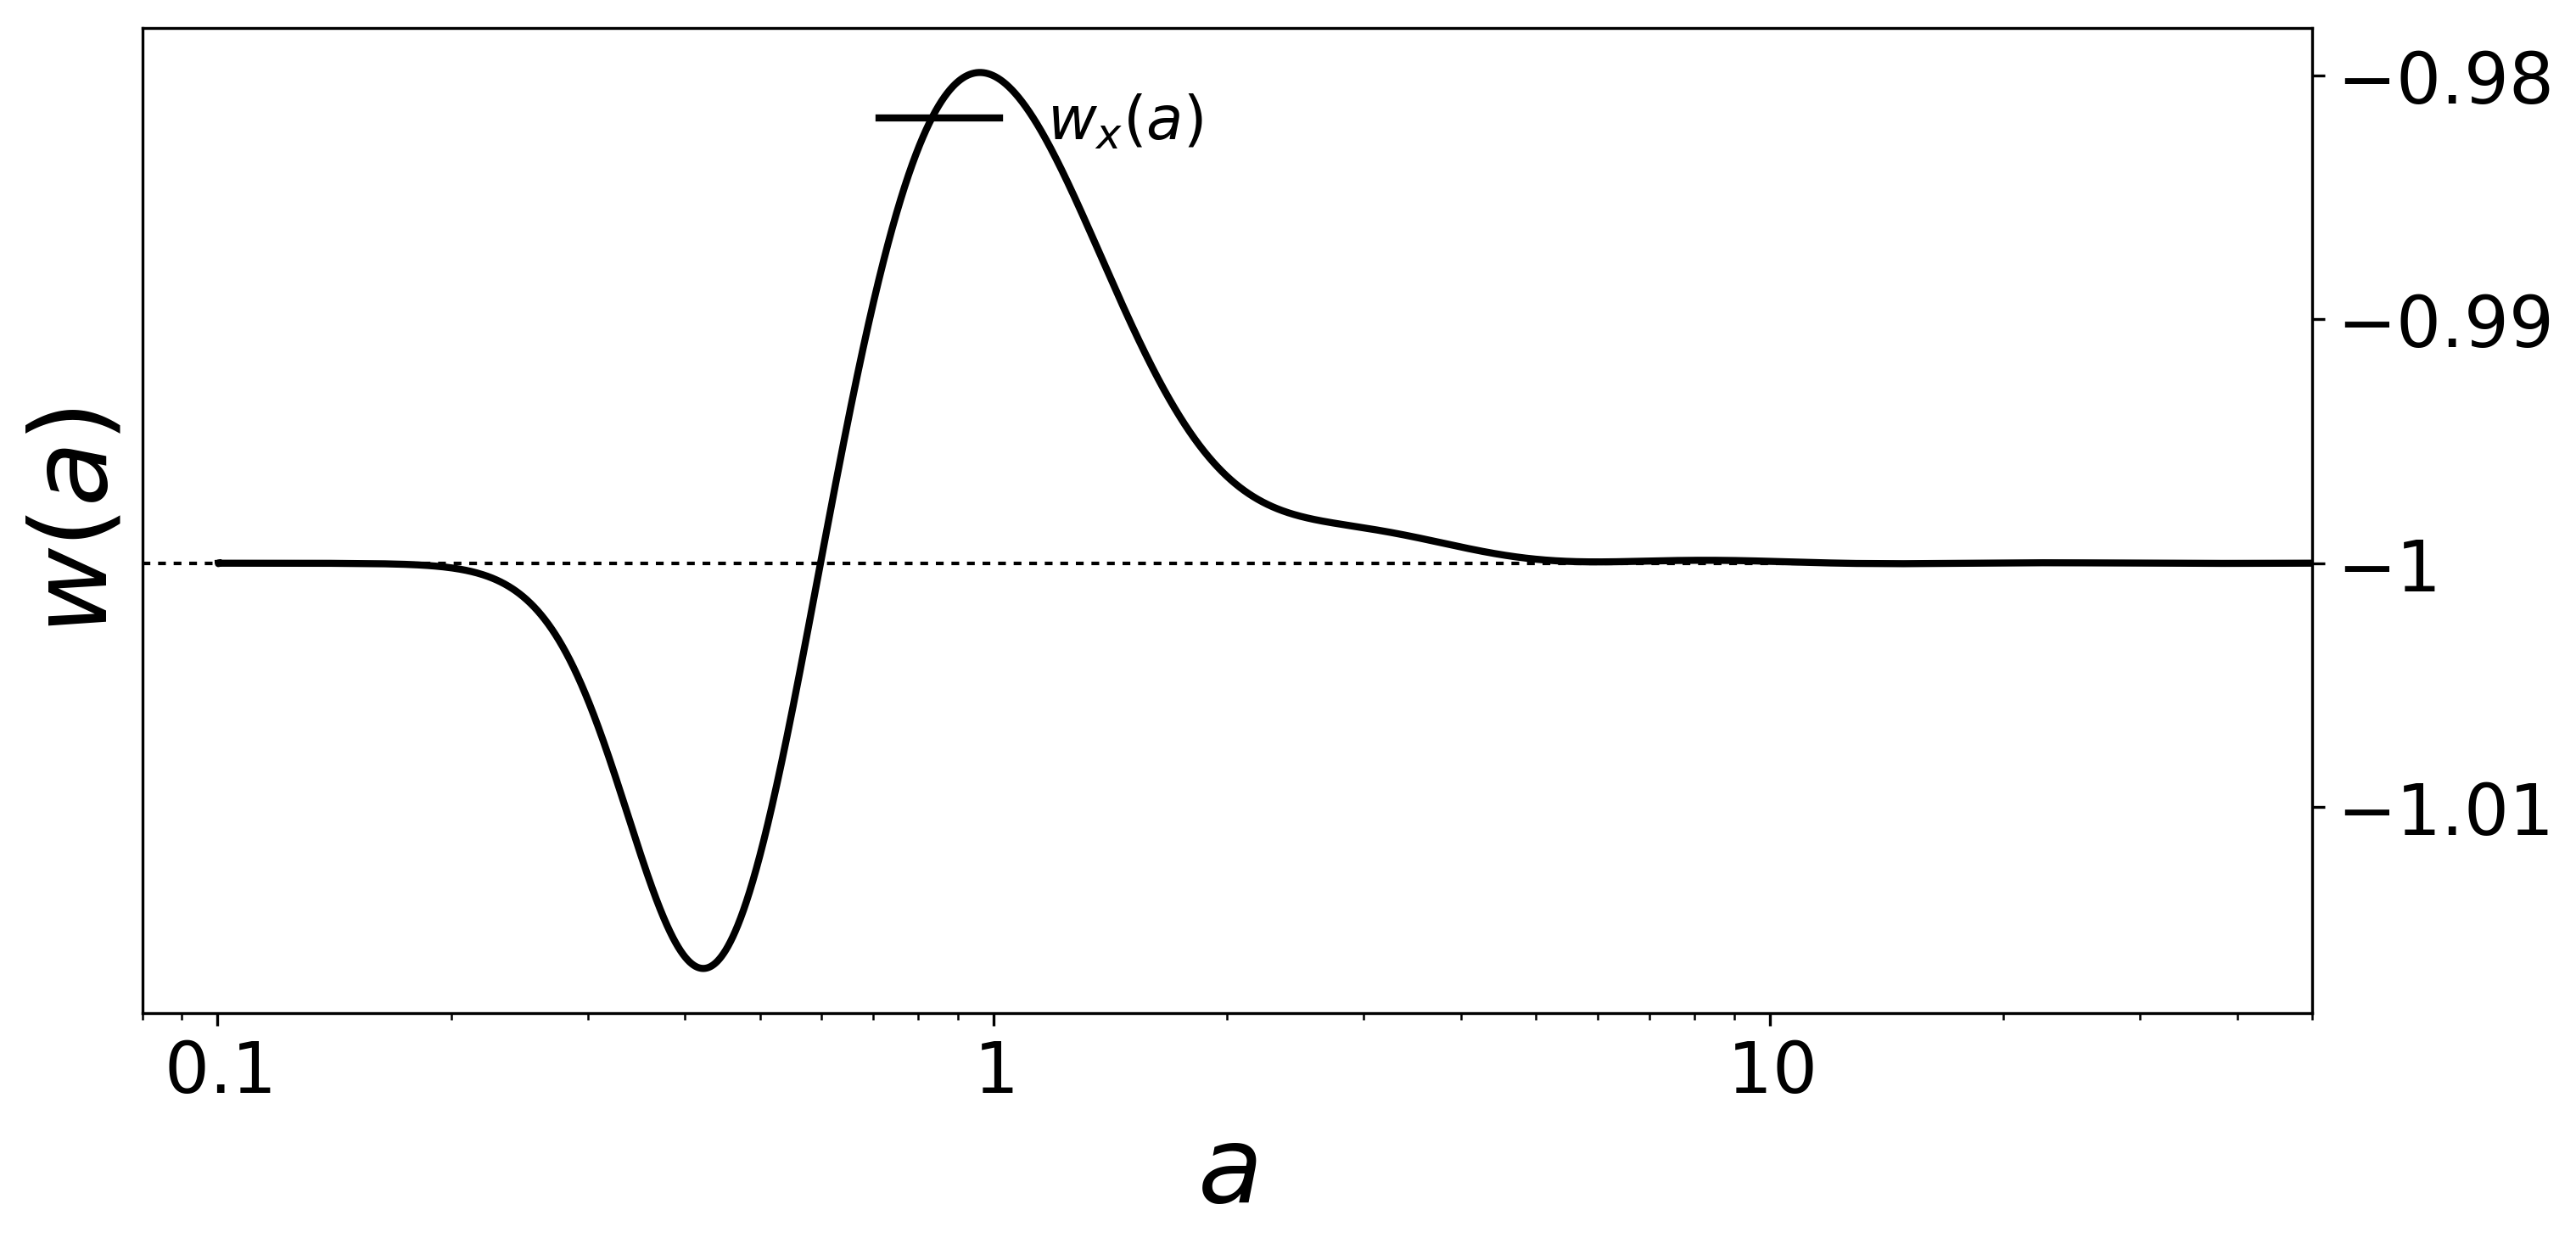

In [5]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2

fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()

plot(ascale, wx, ls='-', color="black", label = '$w_x(a)$')
#plot(frdata[:,0], frdata[:,3], ls='--', color="red", label = 'total')
plt.legend(bbox_to_anchor=(0.5, 0.85), loc='lower right', borderaxespad=0.,prop={'size':17}, frameon=False)

axhline(y=-1, ls=':', linewidth=1, color='black')

cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$a$', fontsize=30)
ylabel(r'$w(a)$', fontsize=30)

cax.set_xscale('log')
plt.xlim((0.08,50))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################




### Fitting for the EoS

$f_{trial1}(z; \bar{w}_0, w_1, w_2, w_3) = -1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3z)$

$f_{trial2}(z; \bar{w}_0, w_1, w_2, w_3) = -1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3z^{0.66})$

$f_{reduced}(z; \bar{w}_0, w_1, w_2) = -1 + \frac{\bar{w}_0}{1+w_1 z^2}cos(w_2+z)$


In [7]:
def cosfunctoday(x,a,b,c,p):
    return -1 + (a/(1+b*x**p))*cos(c*np.abs(x))
    #return -1 + (a/(1+b*x**p))*cos(c * x**0.66)

In [8]:
def cosfuncpast(x,a,b,c,p):
    return -1 + (a/(1+b*x**p))*cos(c * x**0.66)

In [9]:
def cosreduced(x,a,b,c):
    return -1 + (a/(1+b*x**2))*cos(c + x)

In [10]:
def cosfunctionphase(x,a,b,c,p):
    return -1 + (a/(1+b*x**p))*cos(c+np.abs(x))
    #return -1 + (a/(1+b*x**p))*cos(c * x**0.66)

In [18]:
#zdata = np.linspace(0, 4, 13863)

#y = cosfunc(zdata, 0.02,0.04,2,7)

frdatacut = np.loadtxt('eos-fit-Hun4-hasta3.dat')
vectorize(frdatacut)
zdata=frdatacut[:,0]
wxcut= frdatacut[:,2]



popt1, pcov1 = curve_fit(cosfunctoday, zdata, wxcut, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt3, pcov3 = curve_fit(cosfunctionphase, zdata, wxcut, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt2, pcov2 = curve_fit(cosfuncpast, zdata, wxcut, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)


#popt3, pcov3 = curve_fit(cosreduced, zdata, wxcut, p0=(0.02,0.04,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt1, popt2, popt3

(array([  1.97039021e-02,   6.09808791e-03,   2.05938598e+00,
          7.31885613e+00]),
 array([ 0.0235996 ,  0.03739032,  2.06128783,  5.16946018]),
 array([ 0.03821225,  0.09876071,  0.89560912,  4.84431929]))

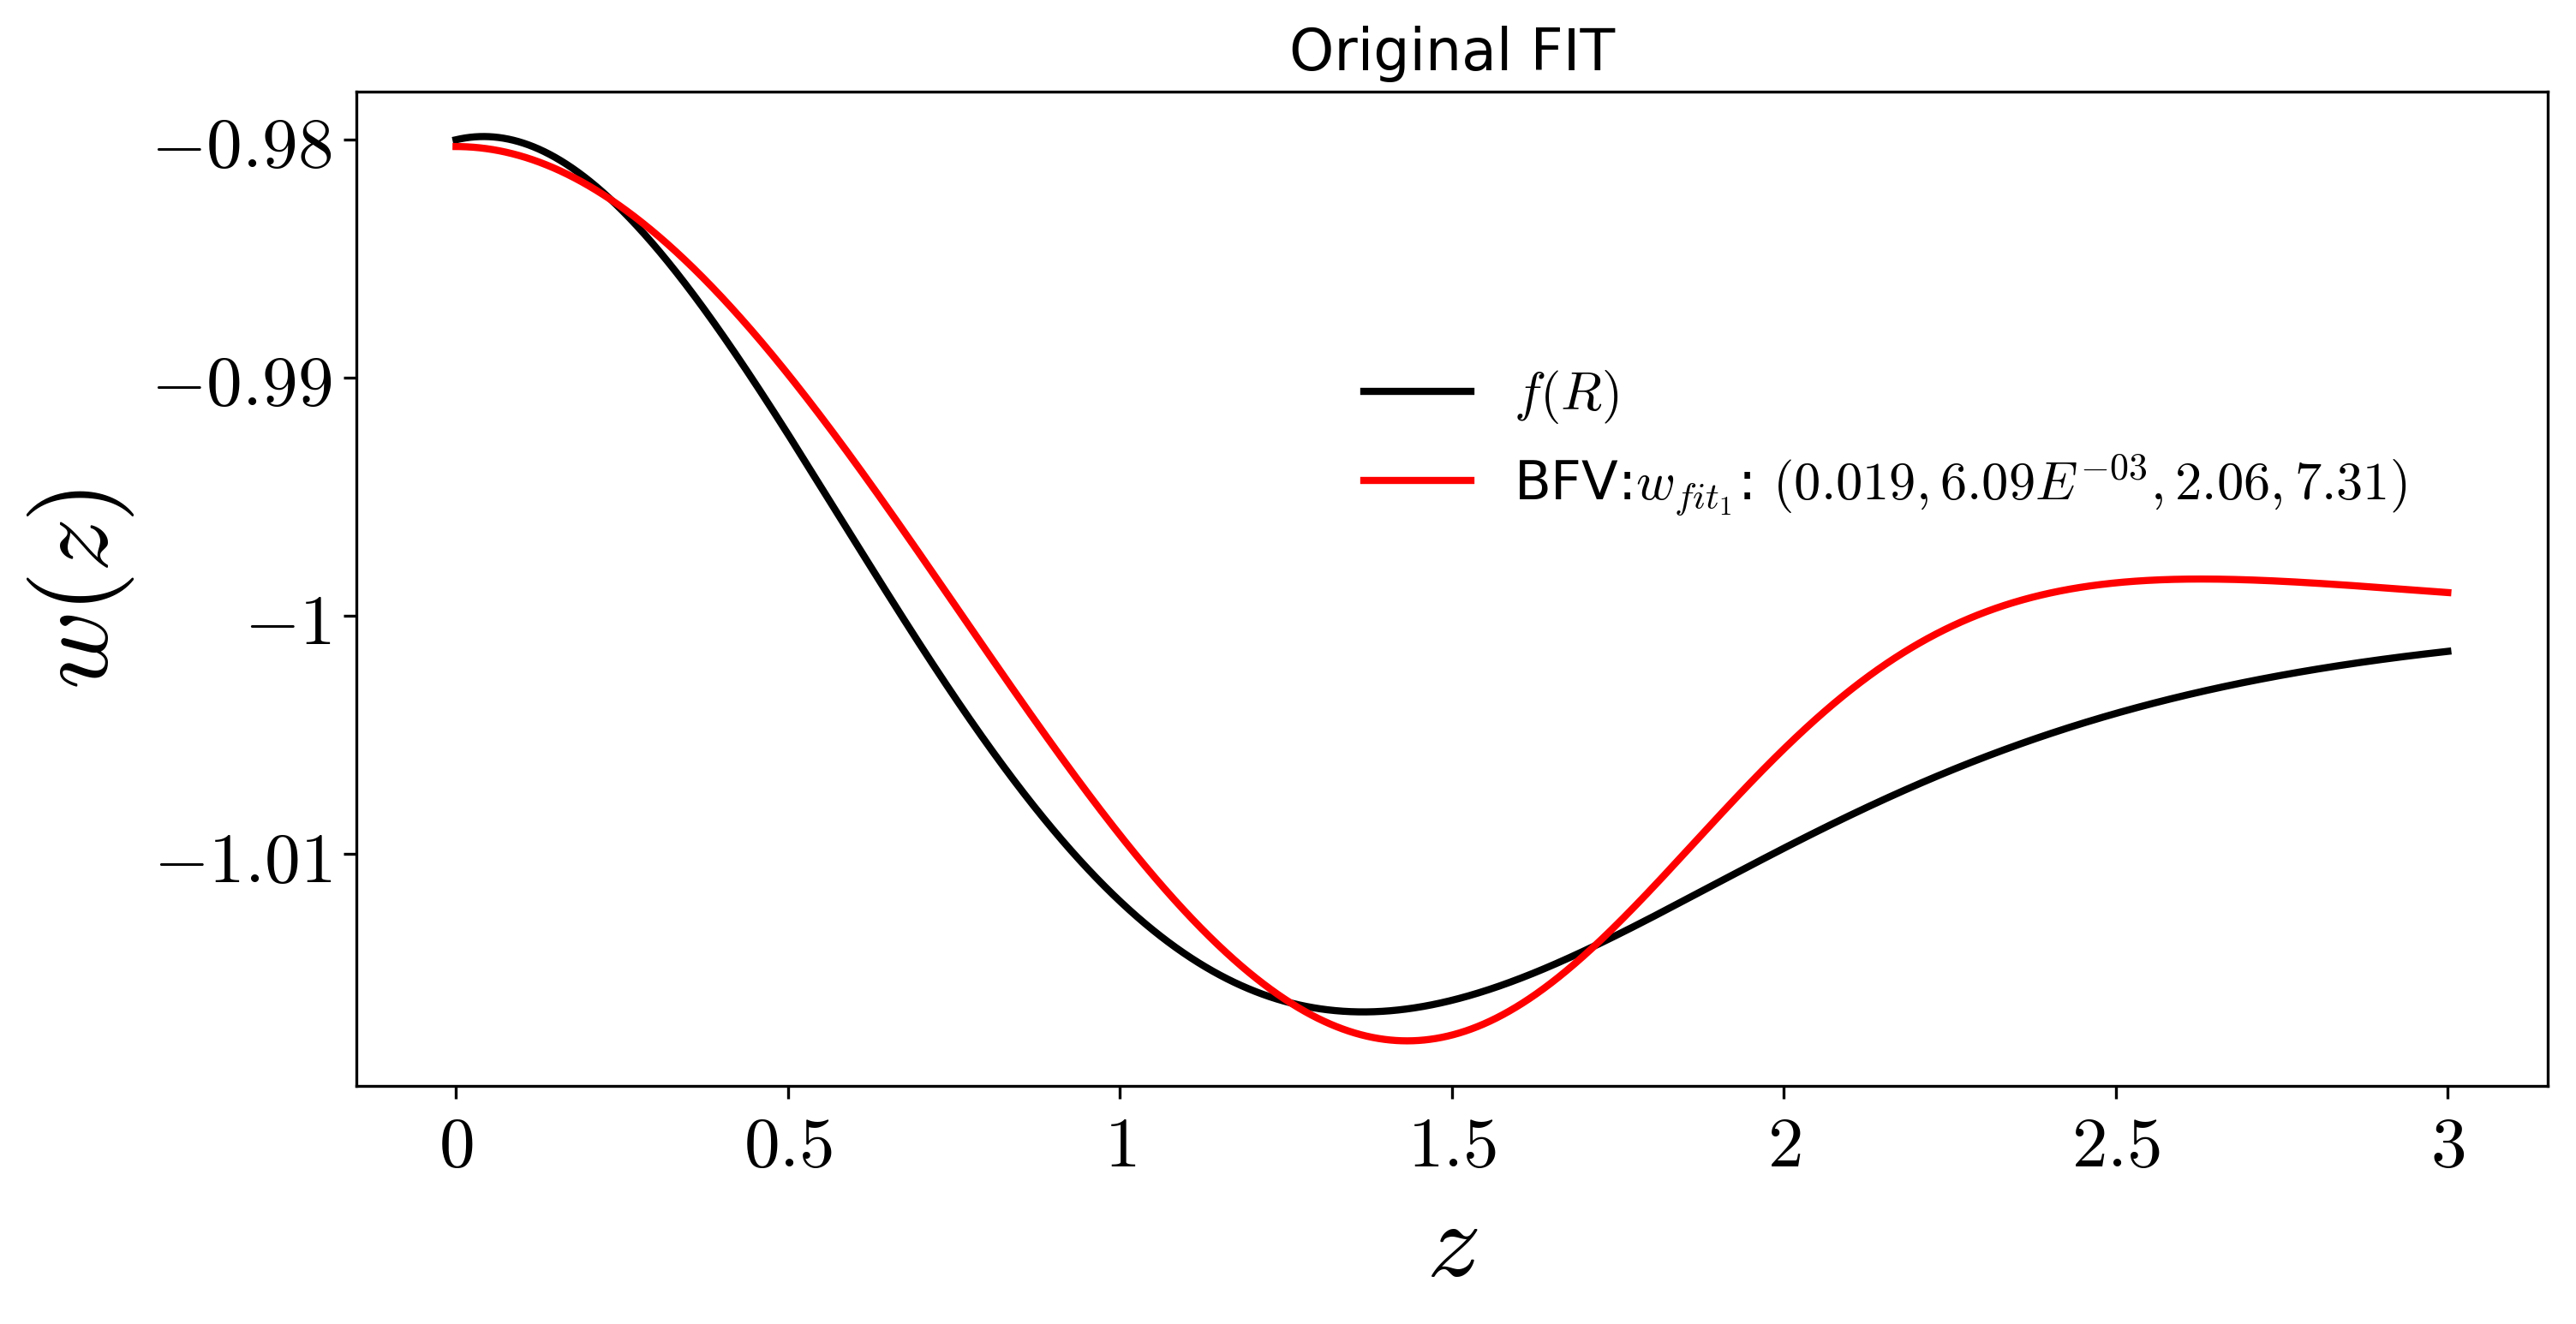

In [12]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()



#y1 = cosfunctoday(zdata, 0.02,0.04,1.9,5)
y1best = cosfunctoday(zdata, *popt1)




plot(zdata, wxcut, color='black', label=r'$f(R)$ ')
#plot(zdata,y1, ls='--', label=r'$w_{fit_1}$: $(0.02, 0.04,1.9,5)$', color ='blue')


plot(zdata, y1best, color = 'red', label=r'BFV:$w_{fit_1}$: $(0.019, 6.09E^{-03}, 2.06, 7.31)$')
#1.97039021e-02,   6.09808791e-03,   2.05938598e+00,7.31885613e+00

plt.title(r'Original FIT', size=16)
#= $-1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3 x)$
plt.legend(bbox_to_anchor=(0.45, 0.55), loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)





cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#cax.set_xscale('log')
#plt.xlim((0.08,50))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################



#savefig('fit1.pdf',bbox_inches='tight')

##savefig('../../../SteepEoS-BAO-CMB/PaperLatex/paperfigs/data-fit.pdf', bbox_inches='tight')

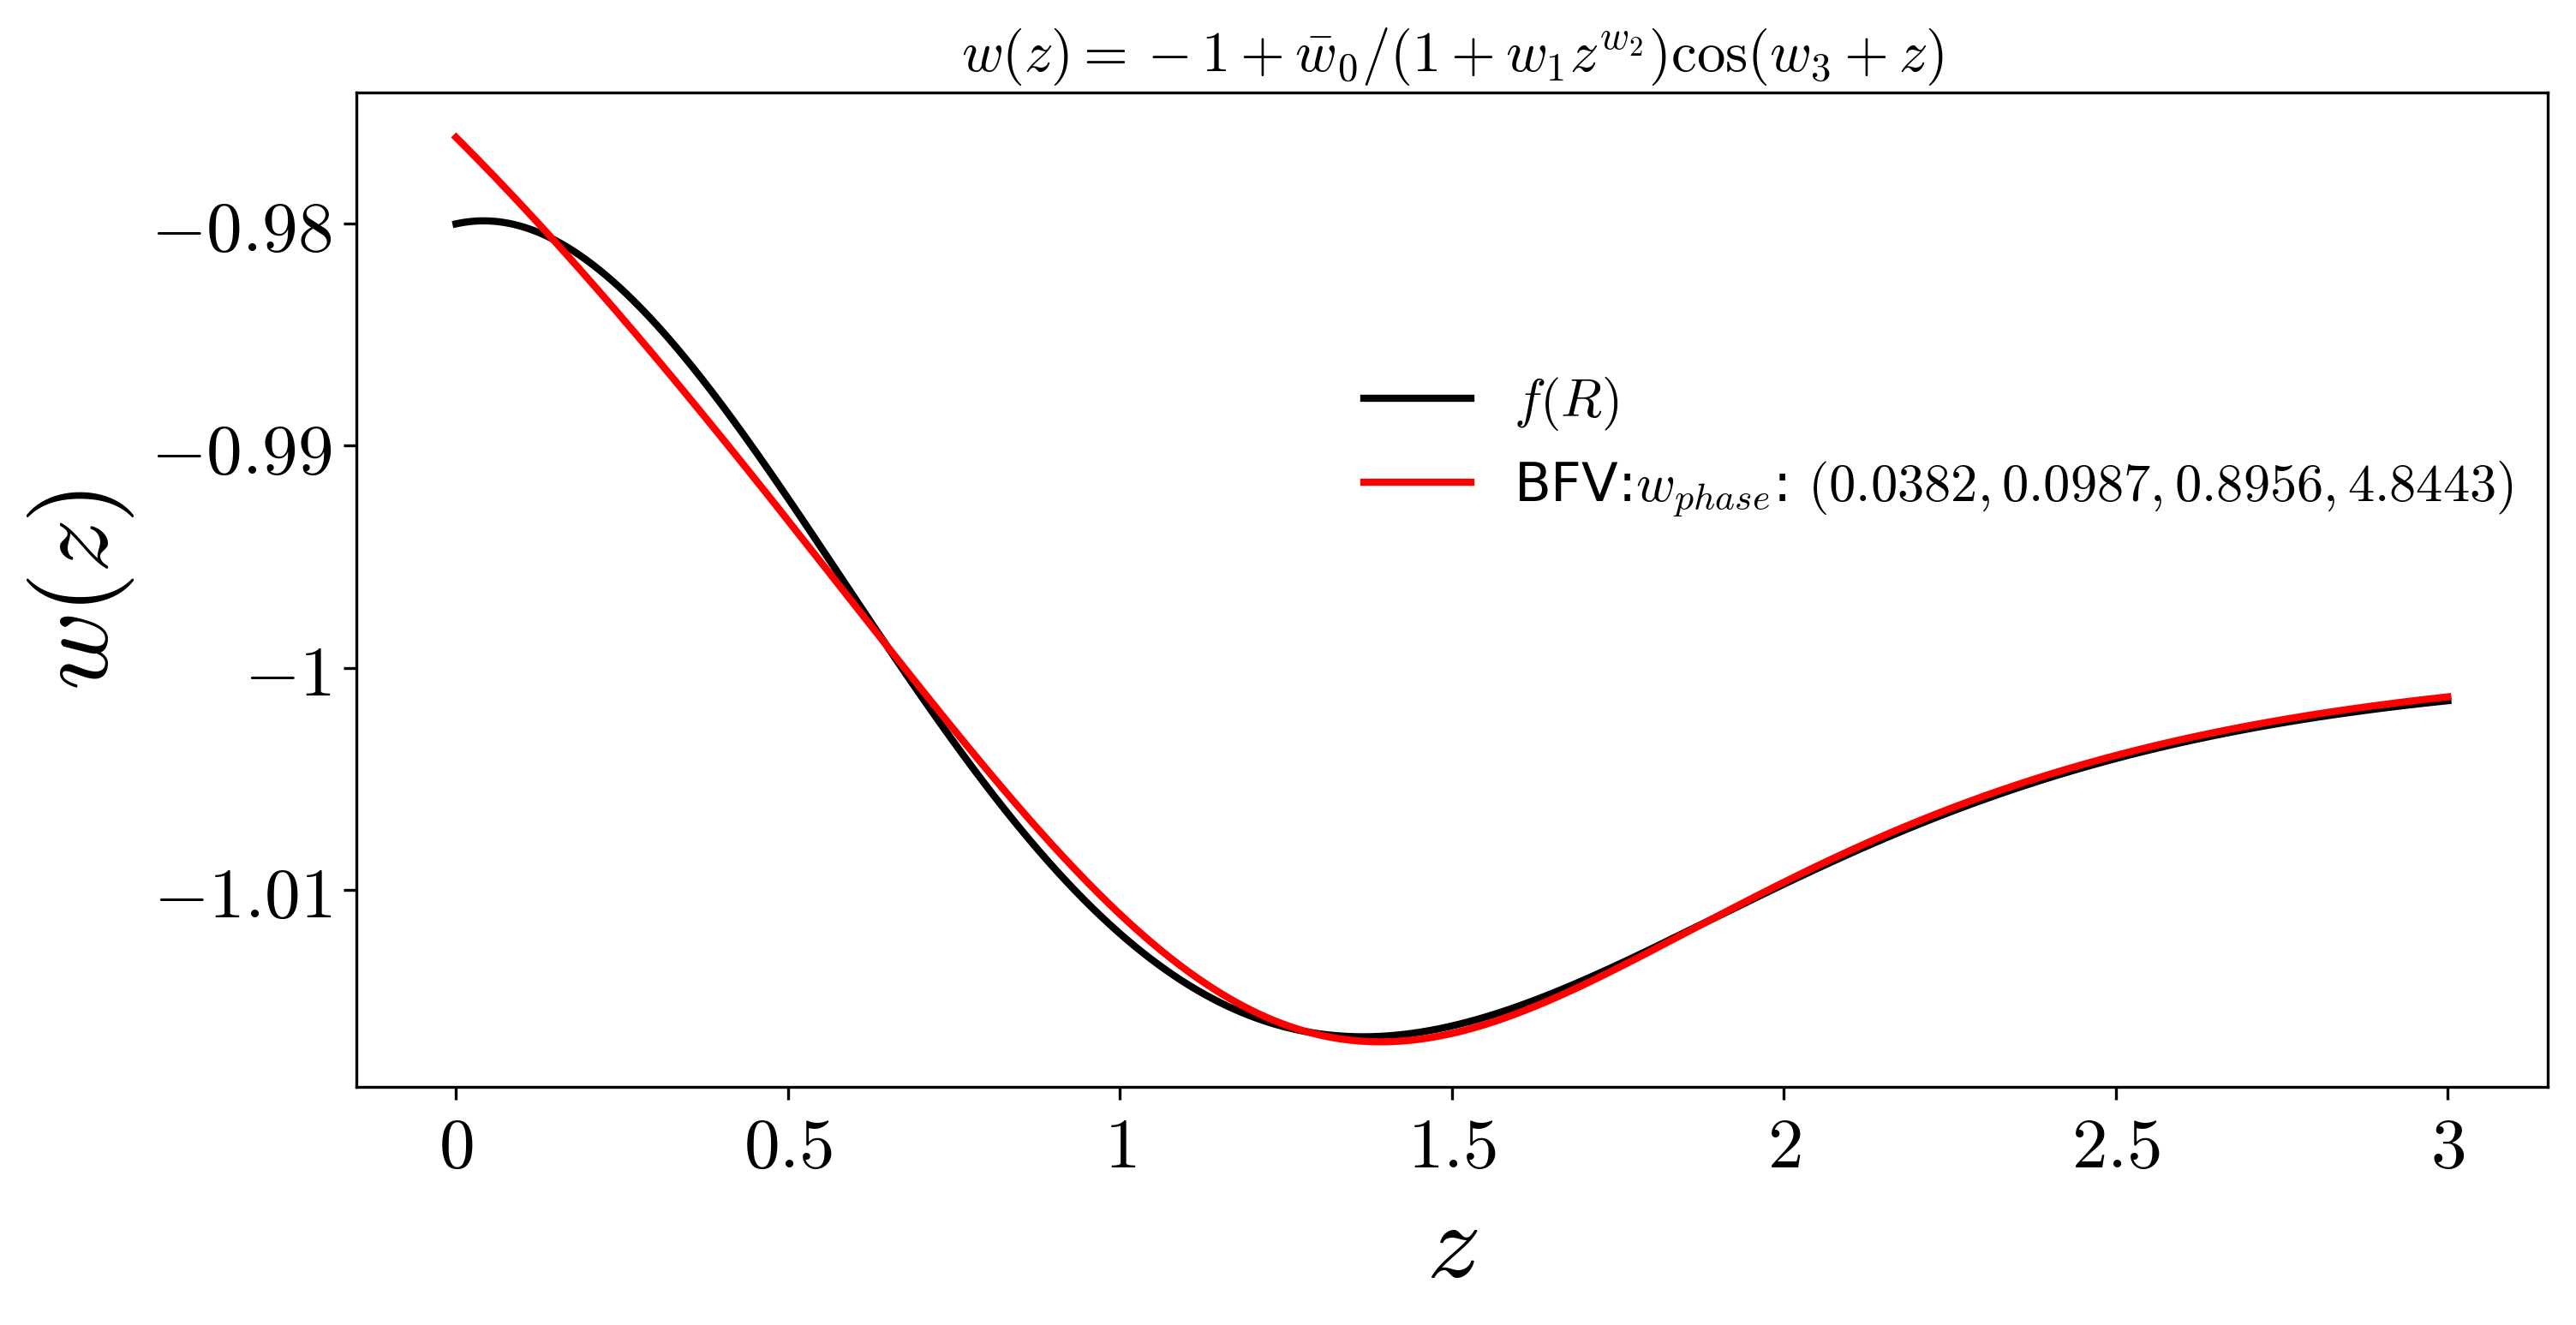

In [24]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()



#yphase = cosfunctoday(zdata, 0.02,0.04,1.9,5)
yphasebest = cosfunctionphase(zdata, *popt3)




plot(zdata, wxcut, color='black', label=r'$f(R)$ ')
#plot(zdata,y1, ls='--', label=r'$w_{fit_1}$: $(0.02, 0.04,1.9,5)$', color ='blue')


plot(zdata, yphasebest, color = 'red', label=r'BFV:$w_{phase}$: $(0.0382, 0.0987, 0.8956, 4.8443)$')
# 0.03821225,  0.09876071,  0.89560912,  4.84431929

plt.title(r'$w(z)=-1+\bar{w}_0/(1+w_1z^{w_2})\cos{(w_3+z)}$', size=16)
#= $-1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3 x)$
plt.legend(bbox_to_anchor=(0.45, 0.55), loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)





cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#cax.set_xscale('log')
#plt.xlim((0.08,50))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################



savefig('fit1-phase.pdf',bbox_inches='tight')

##savefig('../../../SteepEoS-BAO-CMB/PaperLatex/paperfigs/data-fit.pdf', bbox_inches='tight')

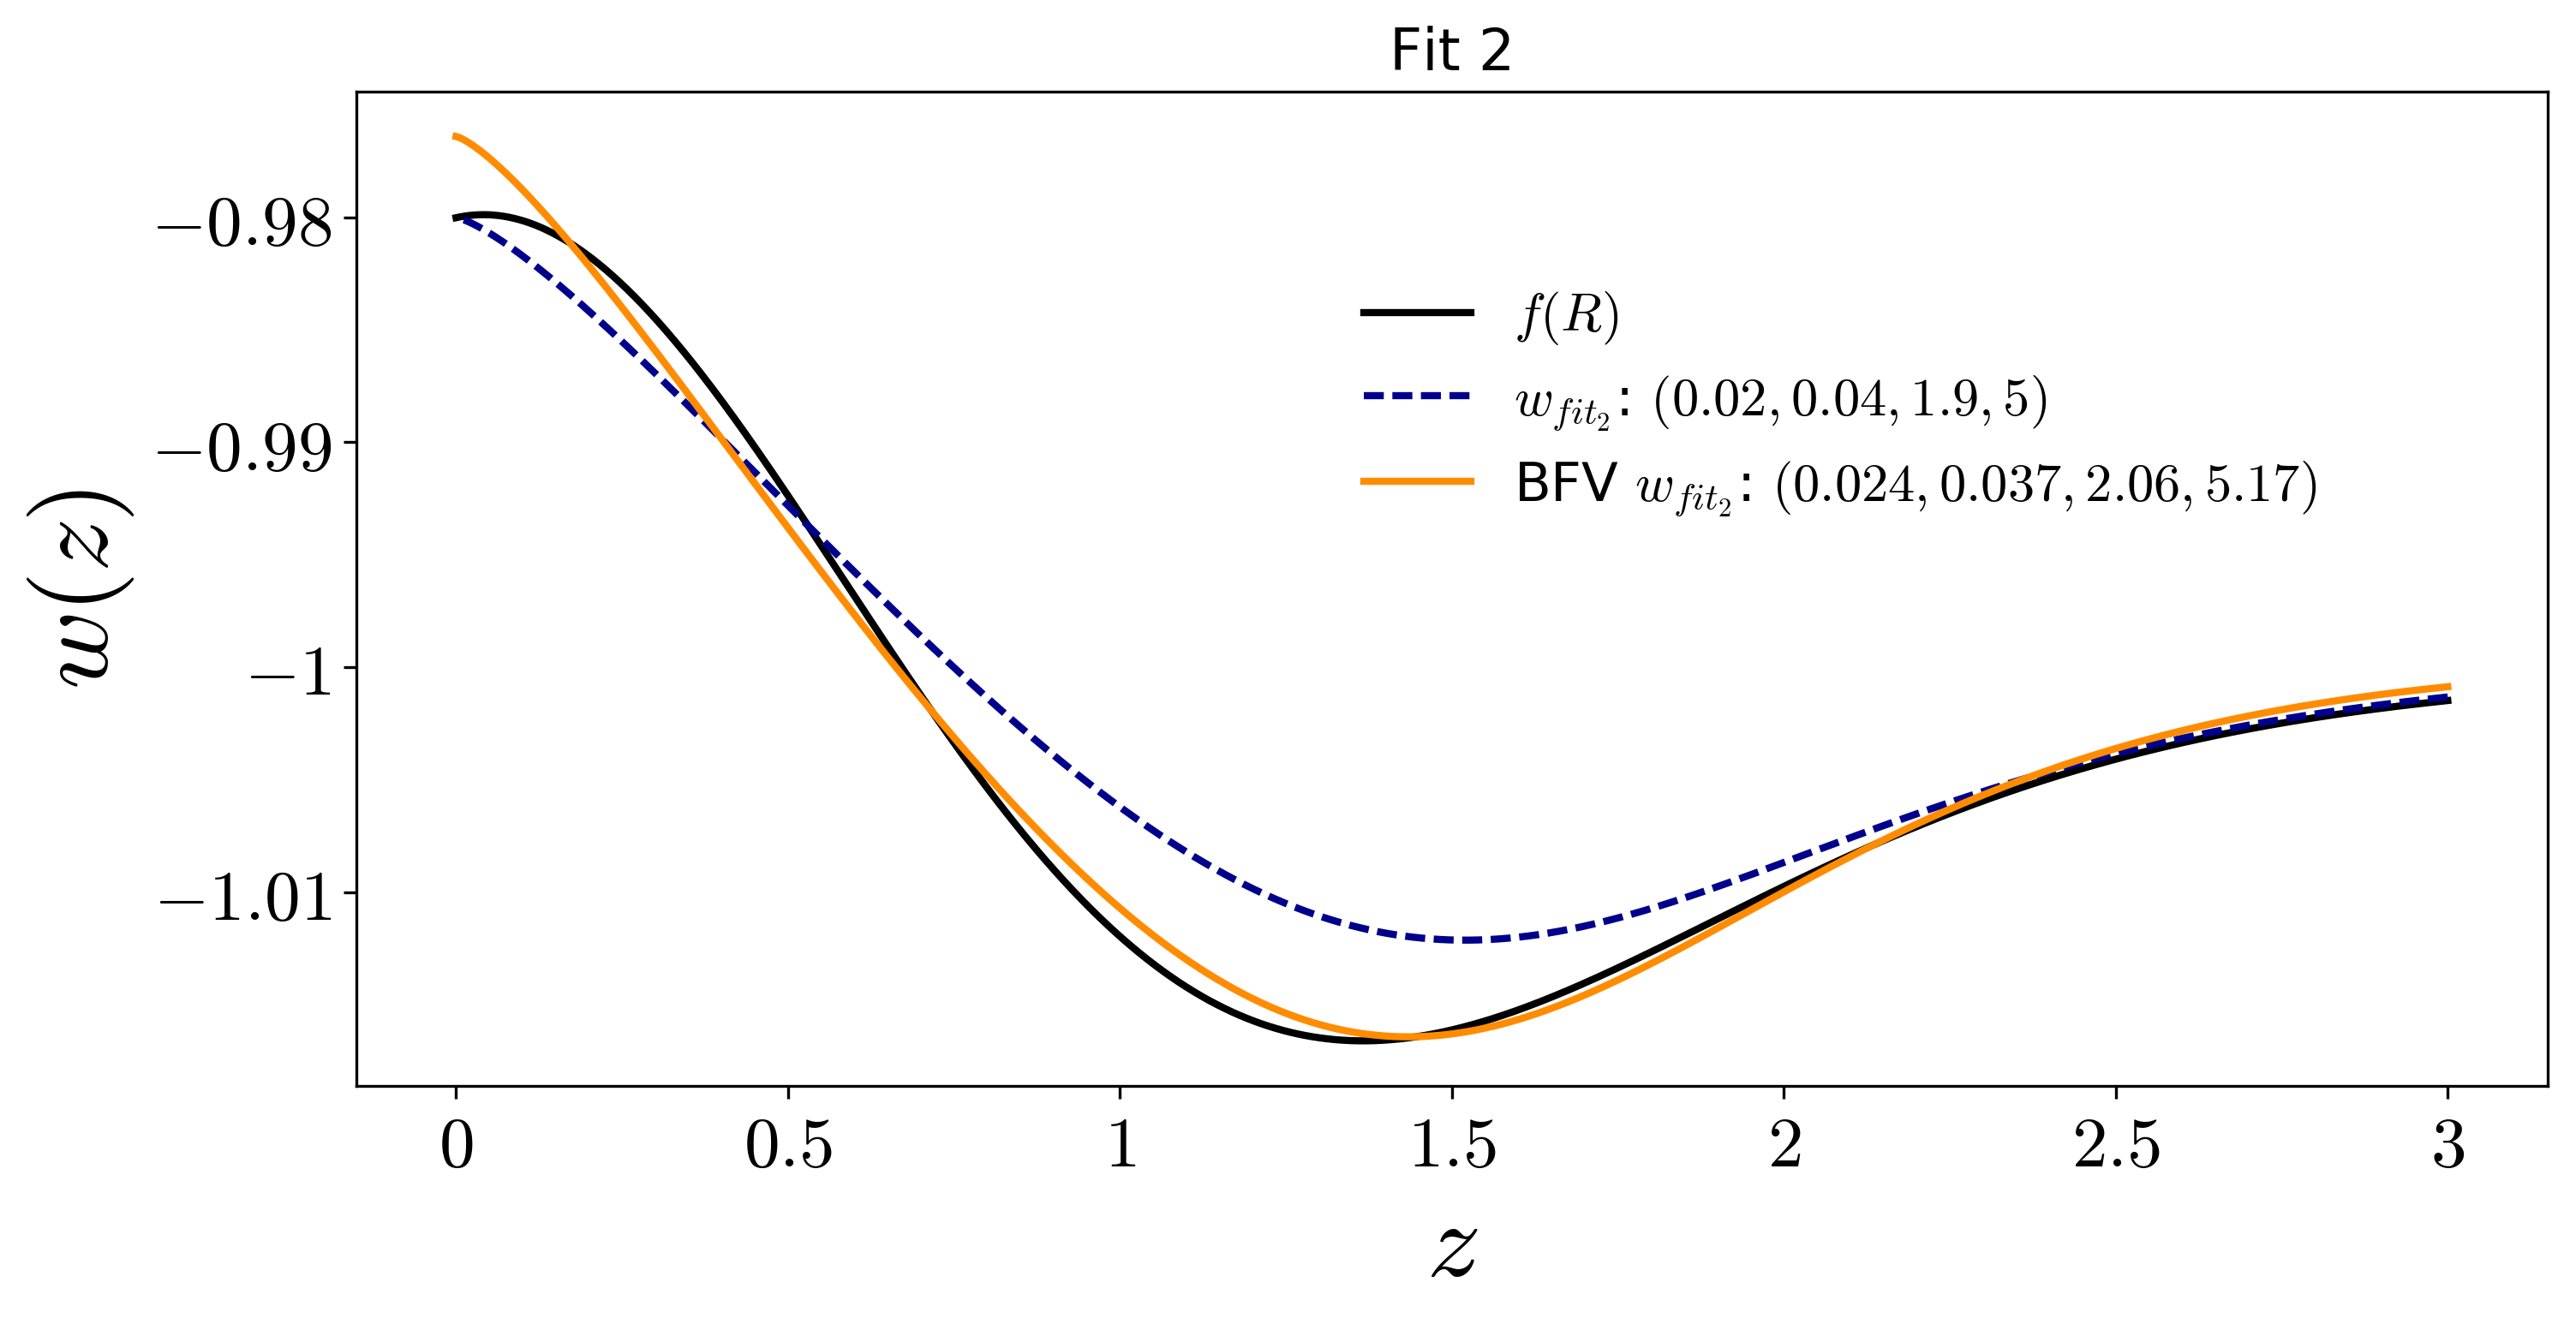

In [11]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()





y2 = cosfuncpast(zdata,0.02,0.04,1.9,5)
y2best = cosfuncpast(zdata, *popt2)

plot(zdata, wxcut, color='black', label=r'$f(R)$ ')

plot(zdata,y2, ls='--', label=r'$w_{fit_2}$: $(0.02, 0.04,1.9,5)$', color = 'darkblue')
plot(zdata, y2best, color = 'darkorange', label=r'BFV $w_{fit_2}$: $(0.024 ,  0.037,  2.06,  5.17)$')

plt.title(r'Fit 2', size=16)

#0.0235996 ,  0.03739032,  2.06128783,  5.16946018
plt.legend(bbox_to_anchor=(0.45, 0.55), loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)





cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#cax.set_xscale('log')
#plt.xlim((0.08,50))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################


savefig('fit2.pdf',bbox_inches='tight')




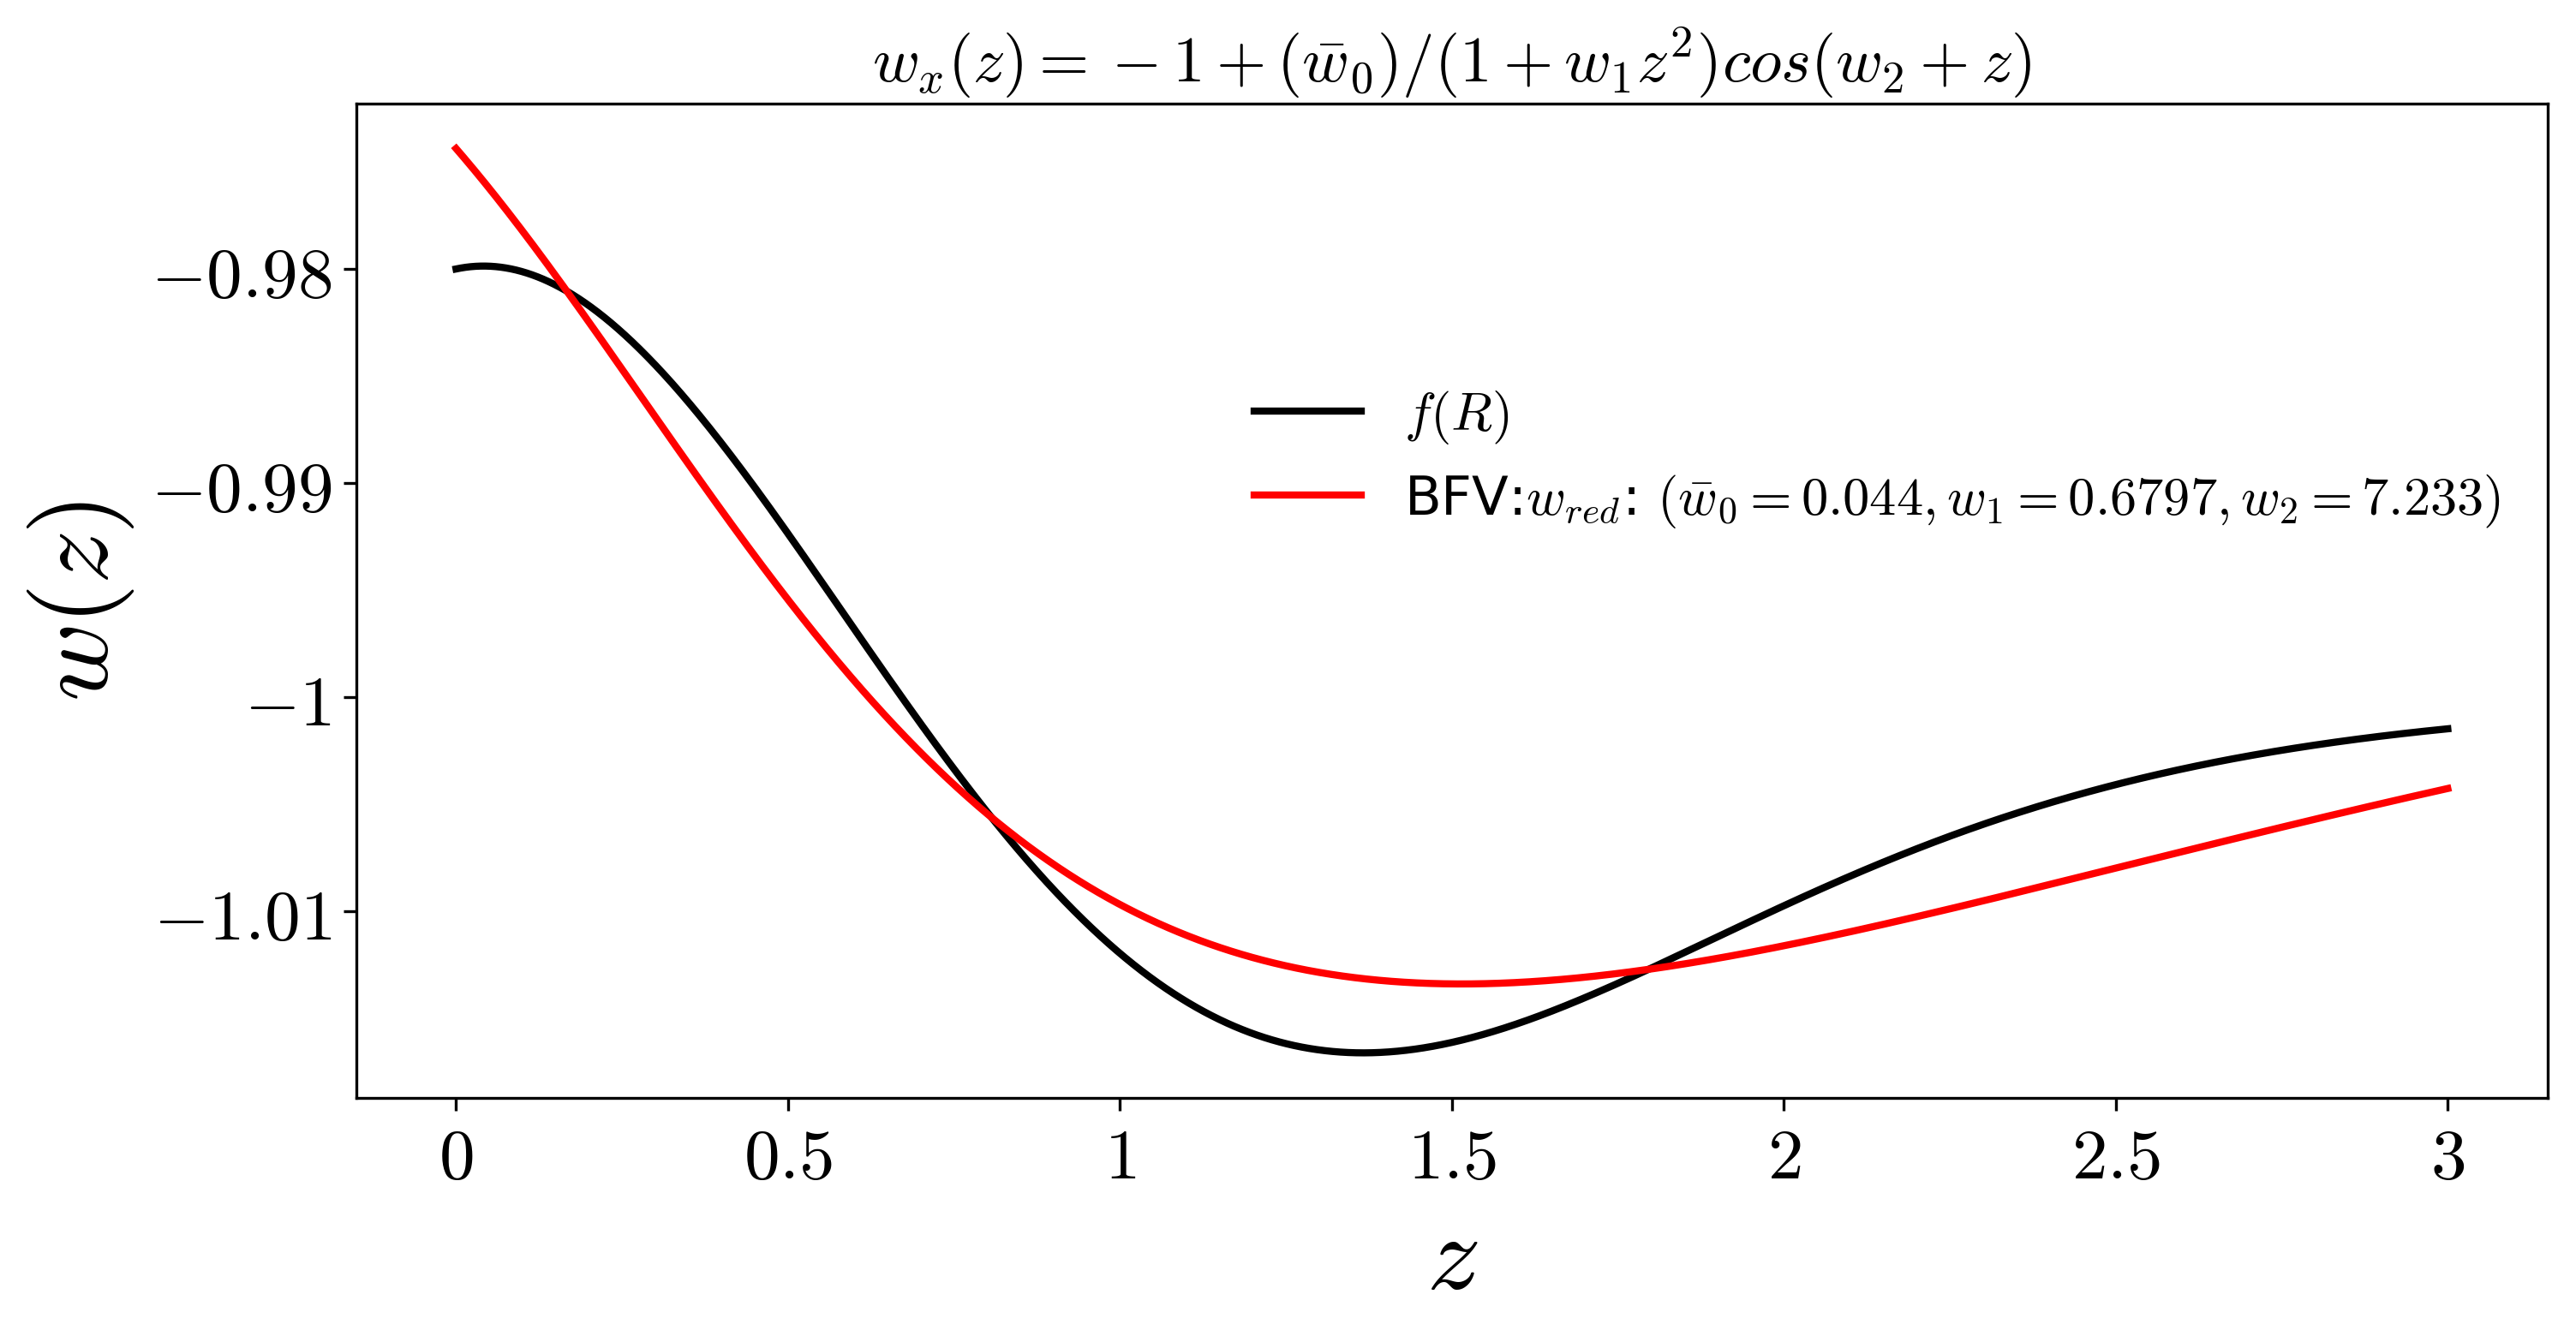

In [12]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()



y3 = cosreduced(zdata, 0.02,0.7,7)
y3best = cosreduced(zdata, *popt3)




plot(zdata, wxcut, color='black', label=r'$f(R)$ ')
#plot(zdata,y3, ls='--', label=r'$w_{reduced}$: $(0.02, 0.7,7)$', color ='blue')


plot(zdata, y3best, color = 'red', label=r'BFV:$w_{red}$: $(\bar{w}_0=0.044,  w_1=0.6797,  w_2=7.233)$')
#1.97039021e-02,   6.09808791e-03,   2.05938598e+00,7.31885613e+00

plt.title(r'$w_x(z)=-1+(\bar{w}_0)/(1+w_1 z^2)cos(w_2+z)$', size=18)
#= $-1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3 x)$
plt.legend(bbox_to_anchor=(0.4, 0.55), loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)





cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#cax.set_xscale('log')
#plt.xlim((0.08,50))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################



savefig('fit3.pdf',bbox_inches='tight')

##savefig('../../../SteepEoS-BAO-CMB/PaperLatex/paperfigs/data-fit.pdf', bbox_inches='tight')

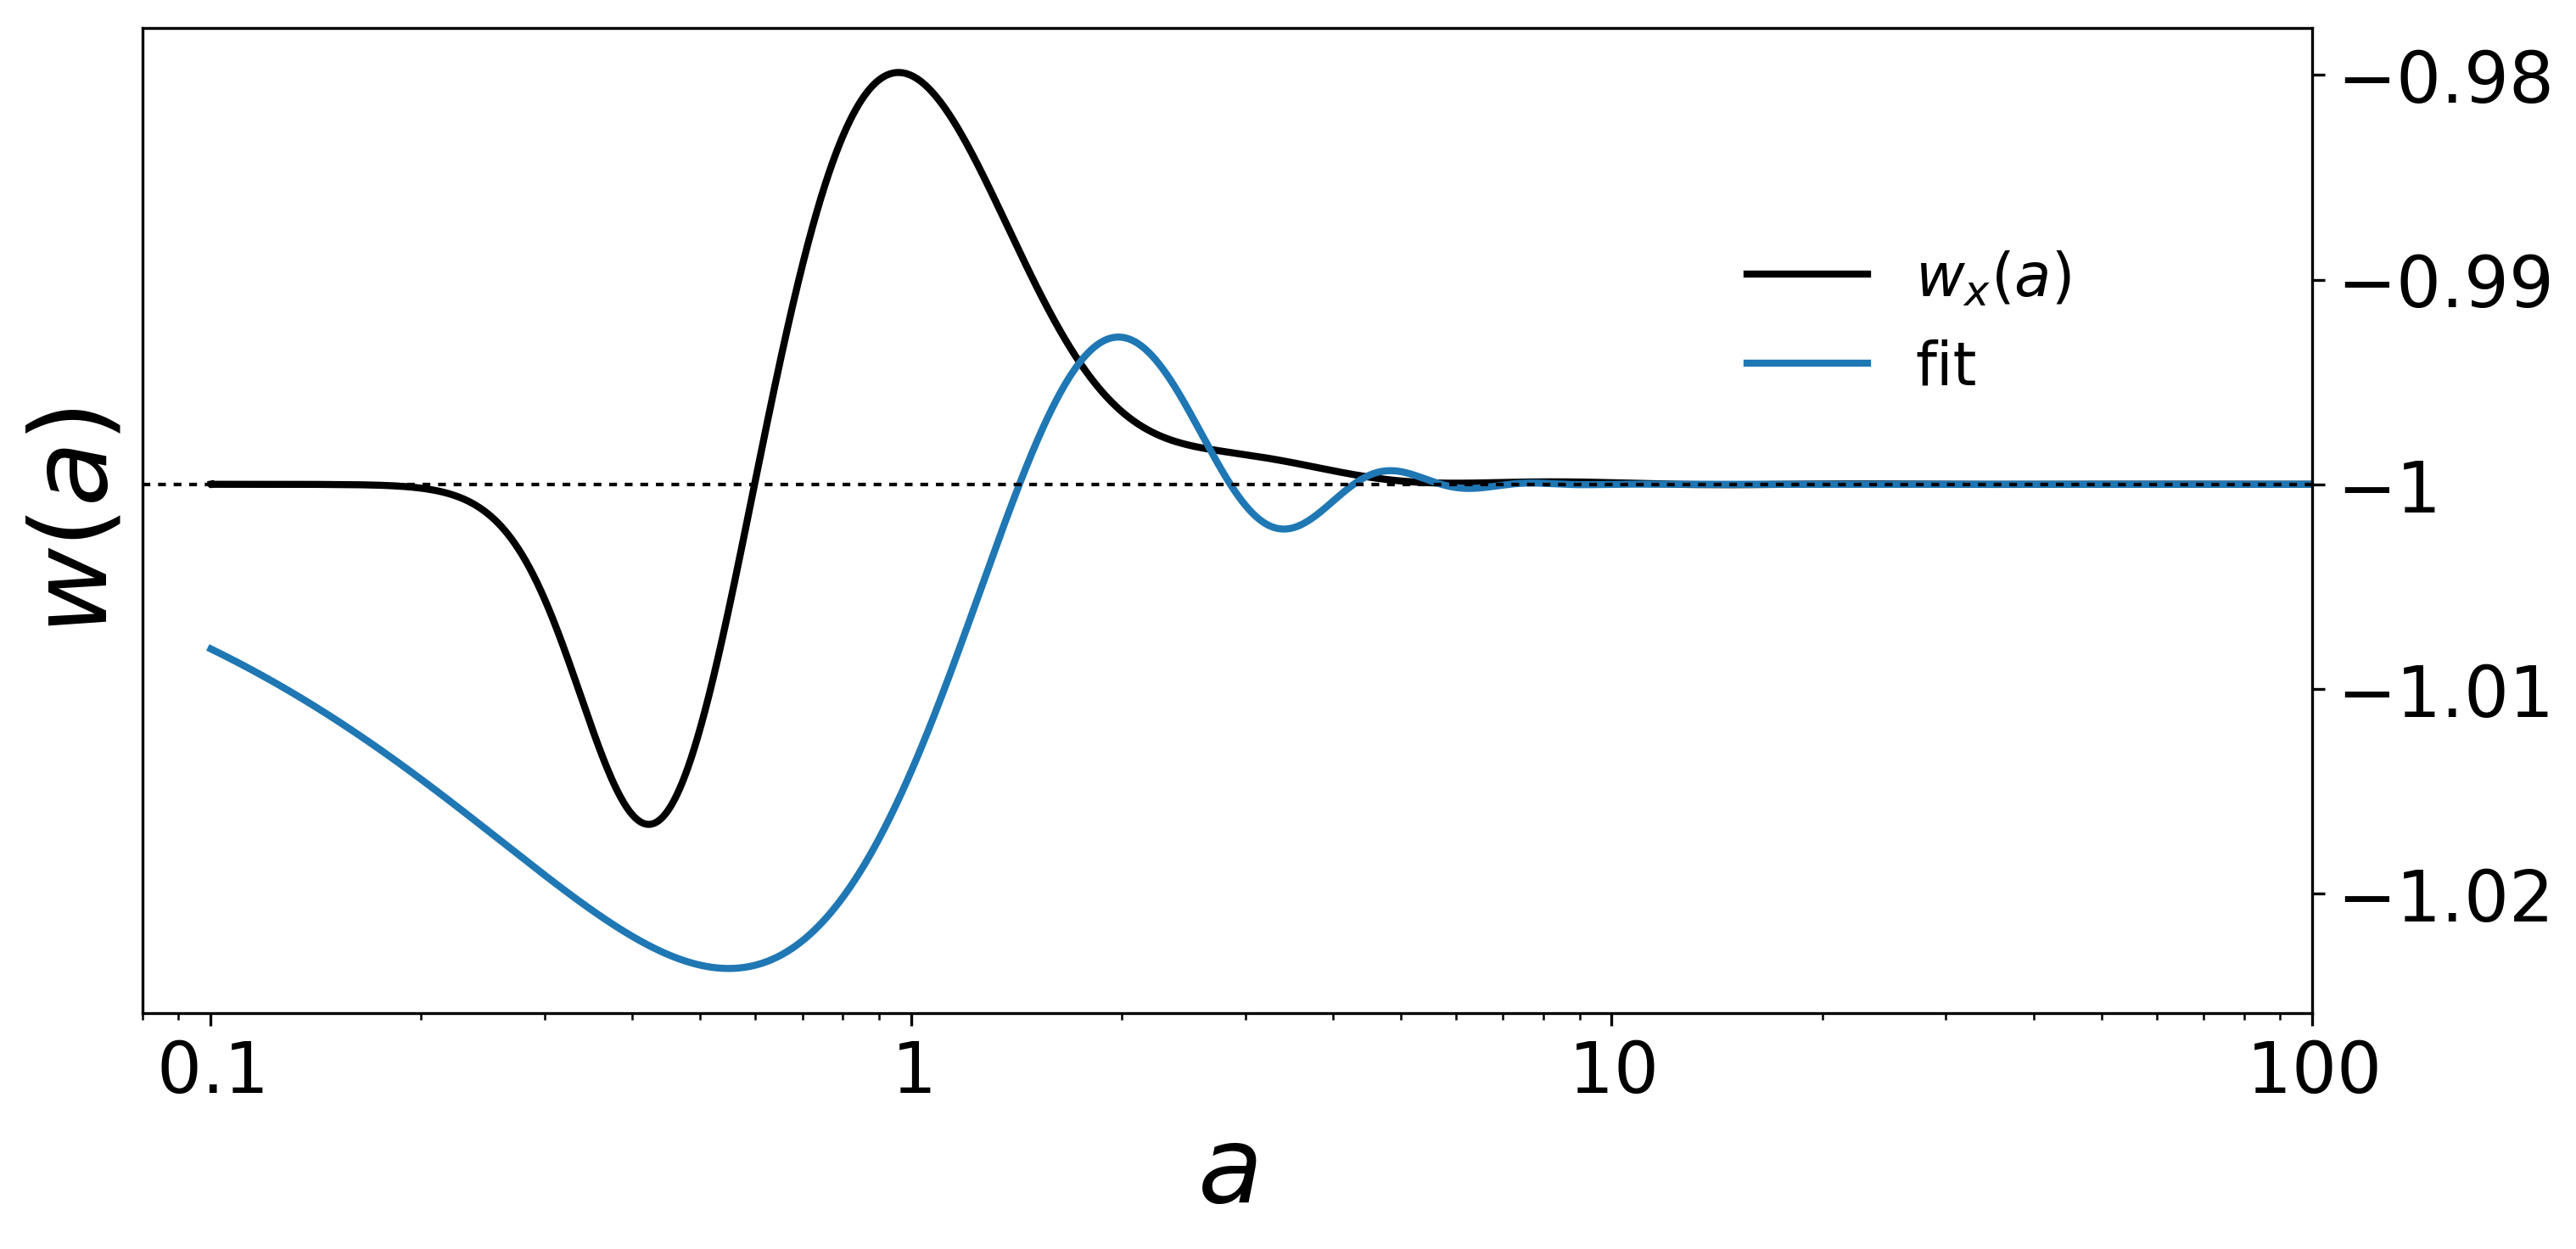

In [6]:
#A= 0.04
#D = 1.2
#f = 0.7*np.pi
#phi = 1*np.pi
#C = -1
#fit=fitfunc(ascale,A, D, f, phi, C)

# Size in inches, and dots per inch
#figsize = (11, 8)
#dpi = 300 #dots per inch

#rcParams['font.size'] = 20
#rcParams['lines.linewidth'] = 2

#fig1=figure(figsize=figsize, dpi=dpi)

#grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
#subplots_adjust(hspace=0.08)
#
#subplot(grid_spec[0])
#cax = gca()

#plot(ascale, wx, ls='-', color="black", label = '$w_x(a)$')
#plot(ascale,  fit, label='fit')
#plot(frdata[:,0], frdata[:,3], ls='--', color="red", label = 'total')
#plt.legend(bbox_to_anchor=(0.9, 0.8),  borderaxespad=0.,prop={'size':17}, frameon=False)

#axhline(y=-1, ls=':', linewidth=1, color='black')


#cax.yaxis.set_ticks_position('right') 
#cax.yaxis.set_major_formatter(FancyFormatter())
#xlabel(r'$a$', fontsize=30)
#ylabel(r'$w(a)$', fontsize=30)

#cax.set_xscale('log')
#plt.xlim((0.08,100))
#cax.yaxis.set_major_formatter(FancyFormatter())
#cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################




In [7]:
#fit1 = np.polyfit(redshifts, wx, 30)
#ffit = np.poly1d(fit1)
#new_wx1 = ffit(redshifts)

#fit2 = np.polyfit(redshifts,wx,10)
#ffit2 = np.poly1d(fit2)
#new_wx2 = ffit2(redshifts)

#fit3 = interp1d(redshifts, wx)



#zmin=min(redshifts)
#zmax=max(redshifts)
#znew=np.linspace(zmin,zmax,50)

/anaconda/envs/CosmoConda36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [8]:
#interp1d?


In [53]:
#figsize = (11, 8)
#dpi = 300

#rcParams['font.size'] = 20
#rcParams['lines.linewidth'] = 2

#fig1=figure(figsize=figsize, dpi=dpi)
#grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
#subplots_adjust(hspace=0.08)

#subplot(grid_spec[0])
#cax = gca()

#plot(redshifts, wx, ls='-', label ='true', color = 'black')
#plot(redshifts, new_wx1, ls='--', label='polyfit 30', color = 'blue')
#plot(redshifts, new_wx2, ls='--', label='polyfit 10', color = 'green')
#plot(znew, fit3(znew), 'ro', label='fit = interp1d(redshifts, wx)')
#plt.axvline(0)
#plt.legend( loc='lower right', borderaxespad=0.,prop={'size':17}, frameon=False)

#cax.yaxis.set_ticks_position('right') 
#cax.yaxis.set_major_formatter(FancyFormatter())

#ylabel(r'$w(z)$', fontsize=30)

#cax.yaxis.set_major_formatter(FancyFormatter())
#cax.xaxis.set_major_locator(plt.NullLocator())


#################### Empty subplot  #####################
#subplot(grid_spec[1])
#cax2 = gca()
#xlabel(r'$z$', fontsize=30)
#cax2.xaxis.set_major_formatter(FancyFormatter())

#plot(redshifts, wx/new_wx1, label = 'poly 30', color='blue')
#plot(redshifts, wx/new_wx2, label = 'poly 10', color='green')
#plot(redshifts, wx/fit3(redshifts), label='1d interp', color='red')
#plt.axvline(0)
#ylabel(r'$w_{true}/w_{fit}(z)$', fontsize=20)
#cax2.yaxis.set_ticks_position('right') 

cax2.yaxis.set_major_formatter(FancyFormatter())

$x(t)={\frac {F_{0}}{mZ_{m}\omega }}\sin(\omega t+\phi )$

In [11]:
def trialfunc1(x, a, b, c):
    return (a/b) * np.sin(b * x + c) 


def trialfunc2(x, a, b):
    return a * np.exp(-x/b) * np.sin(x-2.*np.pi)-1

In [30]:
#def trial1(x, A, D, f, phi, C):
#    return A* np.exp(-x/D)*np.sin(f*x+phi) + C

In [51]:
#A, D, f, phi, C = -1, 1, 1, 2*np.pi, 0
#args = A, D, f, phi, C
#fit1=fitfunc(redshifts, *args)

#plot(redshifts, fit1)
#plot(redshifts, wx, ls='-', color="black")

#plt.xlim(0,3)

In [52]:
#fit1 = np.polyfit(redshifts, wx, 30)
#ffit = np.poly1d(fit1)
#new_wx1 = ffit(redshifts)

#fit2 = np.polyfit(redshifts,wx,10)
#ffit2 = np.poly1d(fit2)
#new_wx2 = ffit2(redshifts)
#
#fit3 = interp1d(redshifts, wx)



#zmin=min(redshifts)
#zmax=max(redshifts)
#znew=np.linspace(0,3,100)

In [48]:
def costriala(a, w0, w1, w2, w3, w4):
    return w0 + w1*(1-a)**w2*cos(w3*a+w4)


In [49]:
#a_array = linspace(1.2,0.1,1000)


In [50]:
#wxcos = costriala(a_array, -0.98, -1, 2, 1,1)
#plot(a_array,wxcos)

In [27]:
#def costrialz(z, w0, w1, w2, w3,w4):
#    t1 = w1*(z/(1+z))**w2
#    t3 = cos(w3/(1+z)+w4)
#    return w0 + t1*t2

In [47]:
#plot(redshifts, wx)
#xlim(0,3)

In [46]:
#plot(redshifts, wx)
#ylim(-1.2,-0.8)
#xlim(-0.2,3)
#axvline(0)
#axhline(-1)

In [45]:
#plot(redshifts, wx)
#axvline(0)
#axhline(-1)

In [44]:
#popt

In [43]:
#pcov